In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torchvision.transforms.v2 as T 
from PIL import Image

/Users/smudge/Documents/code/research/weed-detection/.venv/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/smudge/Documents/code/research/weed-detection/.venv/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still c

In [73]:
#analyse each spectral channel
#EDA

path_x="./data/Sequoia/SequoiaNIR_30/train/0000_nir_weed.png"
path_y="./data/Sequoia/SequoiaNIR_30/trainannot/0000_weed.png"


sample_x=Image.open(path_x)
sample_y=Image.open(path_y)

In [74]:
#convert to numpy images

x_np=np.array(sample_x)
y_np=np.array(sample_y)


In [75]:
x_np

array([[ 93,  91,  93, ...,  71,  82,  99],
       [ 91,  90,  89, ...,  64,  72,  86],
       [ 89,  86,  84, ...,  61,  65,  76],
       ...,
       [120, 122, 119, ...,  62,  66,  72],
       [120, 118, 115, ...,  59,  64,  70],
       [101, 101, 103, ...,  55,  59,  66]], dtype=uint8)

In [76]:
y_np.shape

(1008, 1464)

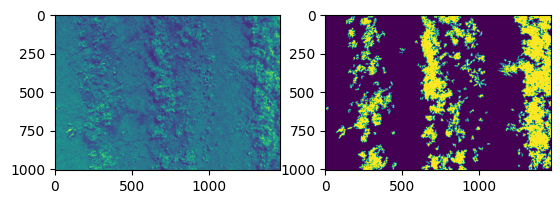

In [77]:
#visualize
fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax1.imshow(x_np)

ax2=fig.add_subplot(1,2,2)
ax2.imshow(y_np)


In [78]:
path_x="./data/Sequoia/SequoiaNIR_30/train/0000_nir_crop.png"
path_y="./data/Sequoia/SequoiaNIR_30/trainannot/0000_crop.png"


sample_x=Image.open(path_x)
sample_y=Image.open(path_y)

x_np=np.array(sample_x)
y_np=np.array(sample_y)


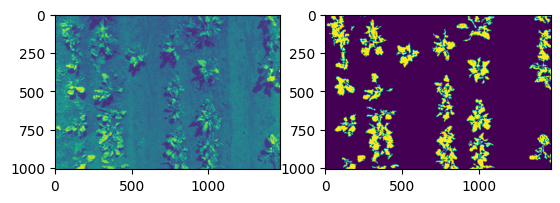

In [79]:
fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax1.imshow(x_np)

ax2=fig.add_subplot(1,2,2)
ax2.imshow(y_np)


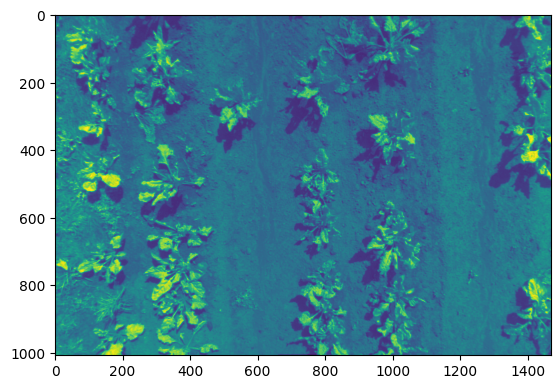

In [80]:
path2_x="./data/Sequoia/SequoiaNirRed_30/train/0000_nir_crop.png"
sample2_x=Image.open(path2_x)

sample2_x=np.array(sample2_x)
plt.imshow(sample2_x)

In [247]:
#test the stacking of channels
path1_x="./data/Sequoia/SequoiaNirRed_30/train/0000_nir_crop.png"
path2_x="./data/Sequoia/SequoiaNdvi_30/train/0000_ndvi_crop.png"
path3_x="./data/Sequoia/SequoiaRed_30/train/0000_red_crop.png"

gt1="./data/Sequoia/SequoiaNIR_30/trainannot/0000_crop.png"
gt2="./data/Sequoia/SequoiaNdvi_30/trainannot/0000_crop.png"
gt3="./data/Sequoia/SequoiaRed_30/trainannot/0000_crop.png"

img1=Image.open(path1_x)
img2=Image.open(path2_x)
img3=Image.open(path3_x)

gti1=Image.open(gt1)
gti2=Image.open(gt2)
gti3=Image.open(gt3)

img1=np.array(img1)
img2=np.array(img2)
img3=np.array(img3)

gti1=np.array(gti1)
gti2=np.array(gti2)
gti3=np.array(gti3)

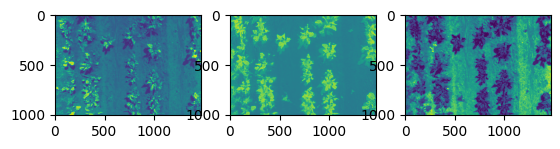

In [234]:
fig=plt.figure()

ax1=fig.add_subplot(1,3,1)
ax1.imshow(img1)

ax2=fig.add_subplot(1,3,2)
ax2.imshow(img2)

ax3=fig.add_subplot(1,3,3)
ax3.imshow(img3)

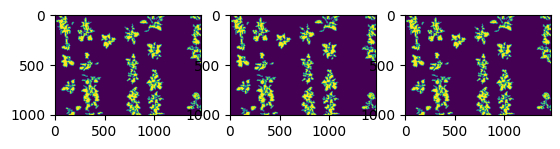

In [235]:
fig=plt.figure()

ax1=fig.add_subplot(1,3,1)
ax1.imshow(gti1)

ax2=fig.add_subplot(1,3,2)
ax2.imshow(gti2)

ax3=fig.add_subplot(1,3,3)
ax3.imshow(gti3)

(array([[1008.,    0.,    0., ...,    0.,    0.,    0.],
        [1008.,    0.,    0., ...,    0.,    0.,    0.],
        [1008.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [ 803.,    0.,    0., ...,    0.,    0.,  205.],
        [ 811.,    0.,    0., ...,    0.,    0.,  197.],
        [ 814.,    0.,    0., ...,    0.,    0.,  194.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1469 BarContainer objects>)

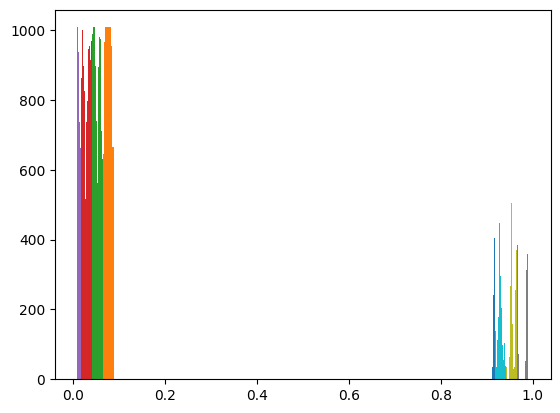

In [246]:
gti1
plt.hist(gti1)

In [237]:
gti2

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [248]:
un,counts=np.unique(gti2,return_counts=True)

In [250]:
un,counts

(array([0, 1], dtype=uint8), array([1263583,  217169]))

In [238]:
gti3

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [239]:
gti1==gti2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [240]:
gti2==gti3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [241]:
gti1==gti3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [242]:
np.max(img1),np.max(img2),np.max(img3)
img1.shape,img2.shape,img3.shape,gti1.shape

((1008, 1469), (1008, 1469), (1008, 1469), (1008, 1469))

In [243]:
#stack the  3 channels

k=np.stack((img1,img2,img3),axis=-1)

In [244]:
k.shape

(1008, 1469, 3)

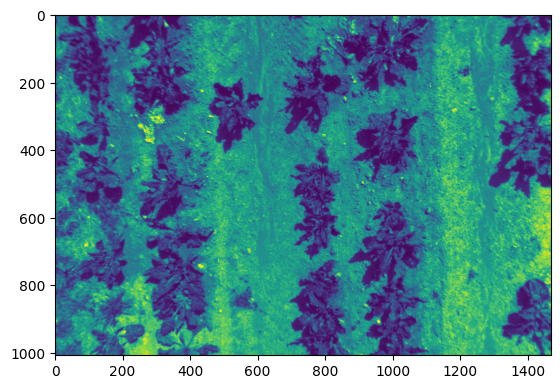

In [131]:
#visualize
plt.imshow(k[:,:,2])


In [135]:
gti1.shape

(1008, 1469, 1)

In [133]:
gti1=np.reshape(gti1,(1008,1469,1))

In [134]:
gti1

array([[[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [147]:
#test set

pathx="./data/Sequoia/SequoiaNIR_30/test/0000_nir_crop.png"
pathy="./data/Sequoia/SequoiaNIR_30/testannot/0000.png"

imgx=Image.open(pathx)
imgy=Image.open(pathy)

imgx=np.array(imgx)
imgy=np.array(imgy)

In [194]:
imgy.shape

(1008, 1469)

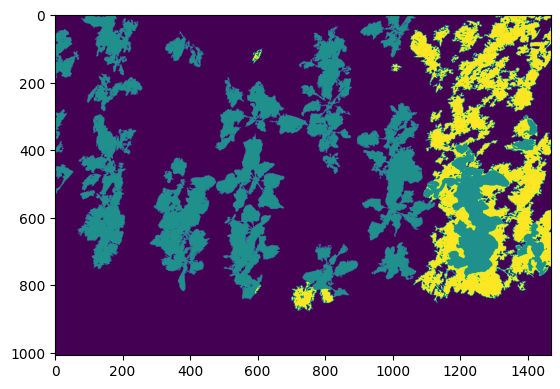

In [165]:
plt.imshow(imgy)

In [213]:
imgy

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [228]:
#one hot conversion

y_enc=np.eye(3,dtype='uint8')[imgy]

In [229]:
y_enc.shape

(1008, 1469, 3)

In [232]:
plt.imshow(y_enc[:,:,2])

In [20]:
#padding

gt1="./data/Sequoia/SequoiaNIR_30/trainannot/0000_weed.png"
gt2="./data/Sequoia/SequoiaNdvi_30/trainannot/0000_weed.png"
gt3="./data/Sequoia/SequoiaRed_30/trainannot/0000_weed.png"


gti1=Image.open(gt1)
gti2=Image.open(gt2)
gti3=Image.open(gt3)

gti1=np.array(gti1)
gti2=np.array(gti2)
gti3=np.array(gti3)

In [26]:
gti1.shape,gti2.shape,gti3.shape

((1008, 1464), (1008, 1464), (1008, 1464))

In [43]:

g=np.pad(gti1,((0,0),(0,5)),'constant',constant_values=(0,0))

In [44]:
g.shape

(1008, 1469)

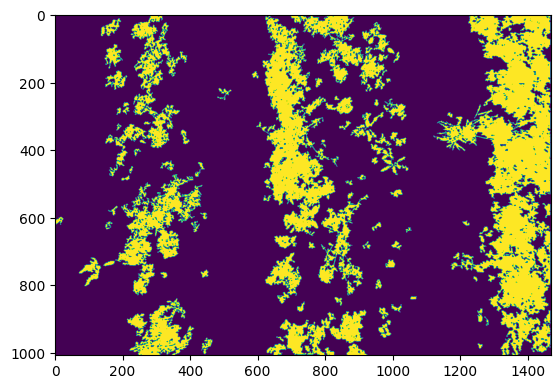

In [45]:
plt.imshow(g)

In [46]:
plt.imshow(gti1)

In [47]:
g=Image.fromarray(g)

trans=T.Resize((1024,1024))
grs=trans(g)

In [48]:
grs.size

(1024, 1024)

In [49]:
plt.imshow(grs)

In [42]:
grs=np.array(grs)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [50]:
pathx="./data/Sequoia/SequoiaNIR_30/test/0000_nir_crop.png"

img=Image.open(pathx)
img=np.array(img)

In [51]:
plt.imshow(img)

In [52]:
k=Image.fromarray(img)

k_resized=trans(k)

In [53]:
k_resized.size

(1024, 1024)

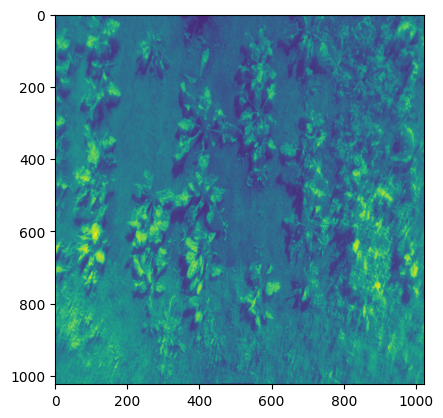

In [54]:
plt.imshow(k_resized)

In [ ]:
plt.imshow()

In [14]:
from data_script import read_file
import torchvision.transforms.v2 as t
train,test=read_file()
ndvi,nir,red=train[0][0],train[0][1],train[0][3]
ground=train[0][2]

In [21]:
n,ni,r,g=Image.open(ndvi),Image.open(nir),Image.open(red),Image.open(ground)
n,ni,r,g=np.array(n),np.array(ni),np.array(r),np.array(g)

In [22]:
image=np.stack((n,ni,r),axis=-1)

In [23]:
image.shape

(1008, 1469, 3)

In [24]:
tens=t.ToTensor()
i=tens(image)

/Users/smudge/Documents/code/research/weed-detection/.venv/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [25]:
i.size()

torch.Size([3, 1008, 1469])

In [26]:
k=np.eye(3,dtype='uint8')[g]

In [27]:
k.shape

(1008, 1469, 3)

In [29]:
kt=tens(k)
kt.size()

torch.Size([3, 1008, 1469])

In [33]:
norm=t.Normalize((0,0,0),(1,1,1))
norm=norm.to(device='mps')
ktn=norm(i)

In [34]:
ktn

tensor([[[0.6510, 0.6510, 0.6471,  ..., 0.8784, 0.8667, 0.8588],
         [0.6431, 0.6471, 0.6471,  ..., 0.8784, 0.8706, 0.8745],
         [0.6196, 0.6078, 0.6078,  ..., 0.8745, 0.8902, 0.9020],
         ...,
         [0.7098, 0.7176, 0.7294,  ..., 0.3098, 0.3294, 0.3725],
         [0.7569, 0.7451, 0.7451,  ..., 0.3843, 0.4039, 0.4078],
         [0.7294, 0.7216, 0.7333,  ..., 0.4039, 0.4157, 0.4157]],

        [[0.5098, 0.5098, 0.5059,  ..., 0.6235, 0.5961, 0.5647],
         [0.5176, 0.5216, 0.5216,  ..., 0.6039, 0.5961, 0.5804],
         [0.4902, 0.4824, 0.4824,  ..., 0.5647, 0.6000, 0.6157],
         ...,
         [0.5020, 0.5137, 0.5373,  ..., 0.2745, 0.2902, 0.3176],
         [0.5451, 0.5373, 0.5529,  ..., 0.3647, 0.3882, 0.3843],
         [0.5216, 0.5176, 0.5451,  ..., 0.4000, 0.4000, 0.3882]],

        [[0.3686, 0.3686, 0.3725,  ..., 0.1725, 0.1765, 0.1725],
         [0.3843, 0.3843, 0.3804,  ..., 0.1686, 0.1725, 0.1647],
         [0.3961, 0.4078, 0.4078,  ..., 0.1608, 0.1569, 0.

In [379]:
path="./data/Sequoia/SequoiaMulti_30/augmentations/annots/ground_aug_10.png"
t=Image.open(path)
n=np.array(t)

In [383]:
path="./data/Sequoia/SequoiaMulti_30/augmentations/samples/ndvi_aug_10.png"
tk=Image.open(path)
n1=np.array(tk)

In [384]:
plt.imshow(n)

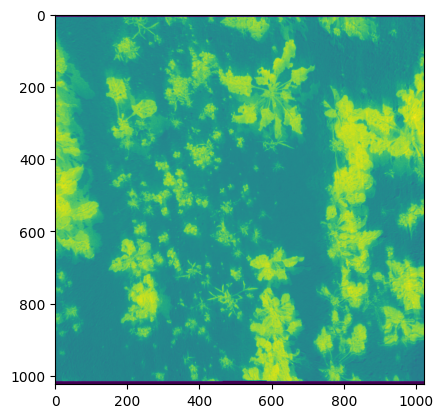

In [385]:
plt.imshow(n1)

In [7]:
k=np.array([[1,2,3],[4,5,6]])
k=k.astype(np.float321)

k=torch.from_numpy(k)


AttributeError: module 'numpy' has no attribute 'float321'

In [7]:
k.sum(dim=1)

tensor([ 6., 15.])

In [12]:
import torch.nn.functional as f

p=f.softmax(k)

/var/folders/m7/fg2s2g0x5tdfqnlsn52yrt3w0000gn/T/ipykernel_1132/3141643182.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p=f.softmax(k)


In [11]:
p

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [13]:
p

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [62]:
from torchvision.models import vgg16_bn,VGG16_BN_Weights,vgg16,VGG16_Weights

model=vgg16(pretrained=True)

/Users/smudge/Documents/code/research/weed-detection/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/smudge/Documents/code/research/weed-detection/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [63]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [64]:
classifier=torch.nn.Sequential(*list(model.classifier.children())[:-7])

In [65]:
model.classifier=classifier

In [66]:
from torchsummary import summary 
summary(model,input_size=(3,1024,1024),batch_size=8,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [8, 64, 1024, 1024]           1,792
              ReLU-2        [8, 64, 1024, 1024]               0
            Conv2d-3        [8, 64, 1024, 1024]          36,928
              ReLU-4        [8, 64, 1024, 1024]               0
         MaxPool2d-5          [8, 64, 512, 512]               0
            Conv2d-6         [8, 128, 512, 512]          73,856
              ReLU-7         [8, 128, 512, 512]               0
            Conv2d-8         [8, 128, 512, 512]         147,584
              ReLU-9         [8, 128, 512, 512]               0
        MaxPool2d-10         [8, 128, 256, 256]               0
           Conv2d-11         [8, 256, 256, 256]         295,168
             ReLU-12         [8, 256, 256, 256]               0
           Conv2d-13         [8, 256, 256, 256]         590,080
             ReLU-14         [8, 256, 2

In [67]:
classi=torch.nn.Sequential(*list(model.features._modules.values()))[:-1]

In [68]:
classi

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [70]:
model.classifier=classi

In [73]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [74]:
summary(model.classifier,input_size=(3,1024,1024),batch_size=8,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [8, 64, 1024, 1024]           1,792
              ReLU-2        [8, 64, 1024, 1024]               0
            Conv2d-3        [8, 64, 1024, 1024]          36,928
              ReLU-4        [8, 64, 1024, 1024]               0
         MaxPool2d-5          [8, 64, 512, 512]               0
            Conv2d-6         [8, 128, 512, 512]          73,856
              ReLU-7         [8, 128, 512, 512]               0
            Conv2d-8         [8, 128, 512, 512]         147,584
              ReLU-9         [8, 128, 512, 512]               0
        MaxPool2d-10         [8, 128, 256, 256]               0
           Conv2d-11         [8, 256, 256, 256]         295,168
             ReLU-12         [8, 256, 256, 256]               0
           Conv2d-13         [8, 256, 256, 256]         590,080
             ReLU-14         [8, 256, 2

In [335]:
k=np.array(
    [[[2,3,4],[2,1,2]],[[3,4,2],[2,1,1]]]
)

k=k.astype(np.float32)

In [336]:
k=k.transpose(2,0,1)

In [337]:
k.shape

(3, 2, 2)

In [338]:
k=torch.from_numpy(k)

In [339]:
k.size()

torch.Size([3, 2, 2])

In [349]:
probs=torch.nn.functional.softmax(k)

/var/folders/m7/fg2s2g0x5tdfqnlsn52yrt3w0000gn/T/ipykernel_10761/425118158.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs=torch.nn.functional.softmax(k)


In [350]:
probs

tensor([[[0.0900, 0.4223],
         [0.2447, 0.5761]],

        [[0.2447, 0.1554],
         [0.6652, 0.2119]],

        [[0.6652, 0.4223],
         [0.0900, 0.2119]]])

In [353]:
preds=torch.argmax(probs,dim=0)


In [354]:
preds.size()

torch.Size([2, 2])

In [29]:
from Weed_dataset import WeedDataset
from torch.utils.data import DataLoader
from arch import Architecture
from data_script import read_file

In [67]:
model=Architecture().to(device=torch.device('mps'))

model.load_state_dict(torch.load("./models/run_5/model310.pth"))

train,test=read_file()

dataset=WeedDataset(test,training=False)
loader=DataLoader(dataset,batch_size=1,shuffle=True)


for i,(x_sample,y_sample) in enumerate(loader):
    x_sample=x_sample.to(device=torch.device("mps"))
    y_sample=y_sample.to(device=torch.device("mps"))

    predictions=model(x_sample)

    if i==0:
        break

In [68]:
#visualize 
x_sample=x_sample.to(device=torch.device("cpu"))
x_sample=x_sample[0].permute(1,2,0)

In [69]:
x_sample

tensor([[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        ...,

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
        

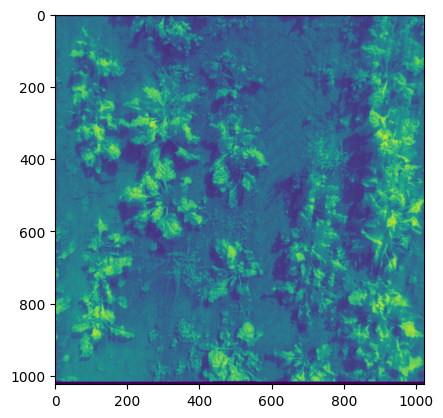

In [70]:
plt.imshow(x_sample[:,:,1])

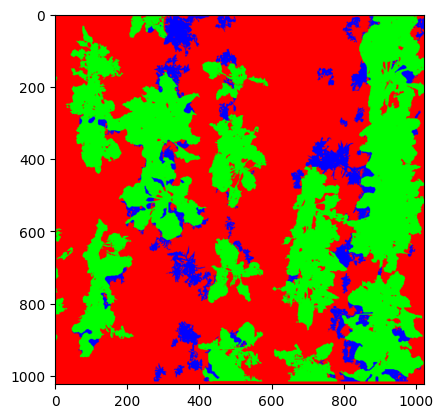

In [71]:
y_sample=y_sample.to(device=torch.device("cpu"))
y_sample=y_sample[0].permute(1,2,0)

plt.imshow(y_sample)

In [72]:
import torch.nn.functional as f

predictions=predictions.to(device=torch.device("cpu"))

probs=f.softmax(predictions,dim=1)
preds=torch.argmax(probs,dim=1)
predictions=torch.zeros_like(probs).scatter_(1,preds.unsqueeze(1),1.)
    

In [73]:
predictions=predictions[0].permute(1,2,0)

In [74]:
predictions

tensor([[[0., 0., 1.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        ...,

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[0., 0., 1.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [0., 0., 1.]]])

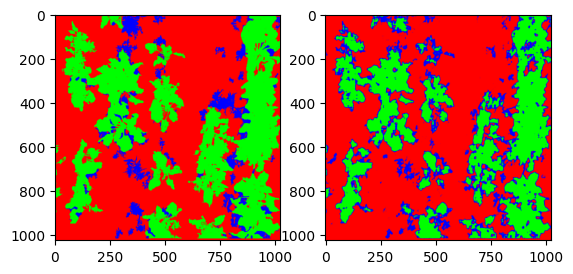

In [75]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.imshow(y_sample)

ax2=fig.add_subplot(1,2,2)
ax2.imshow(predictions)

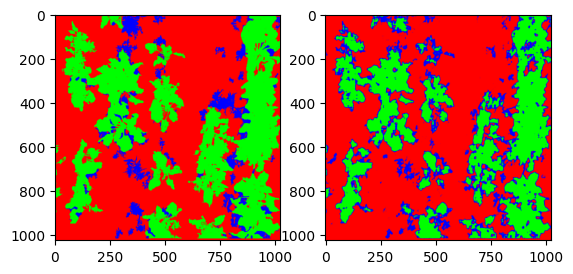

In [76]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.imshow(y_sample)

ax2=fig.add_subplot(1,2,2)
ax2.imshow(predictions)

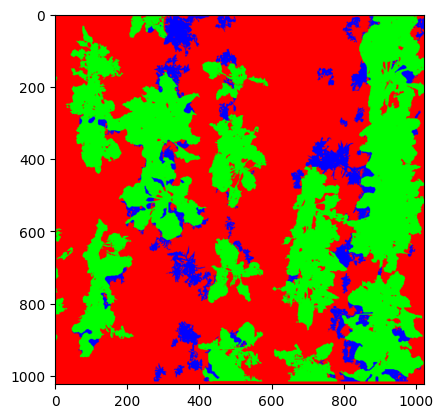

In [77]:
plt.imshow(y_sample)

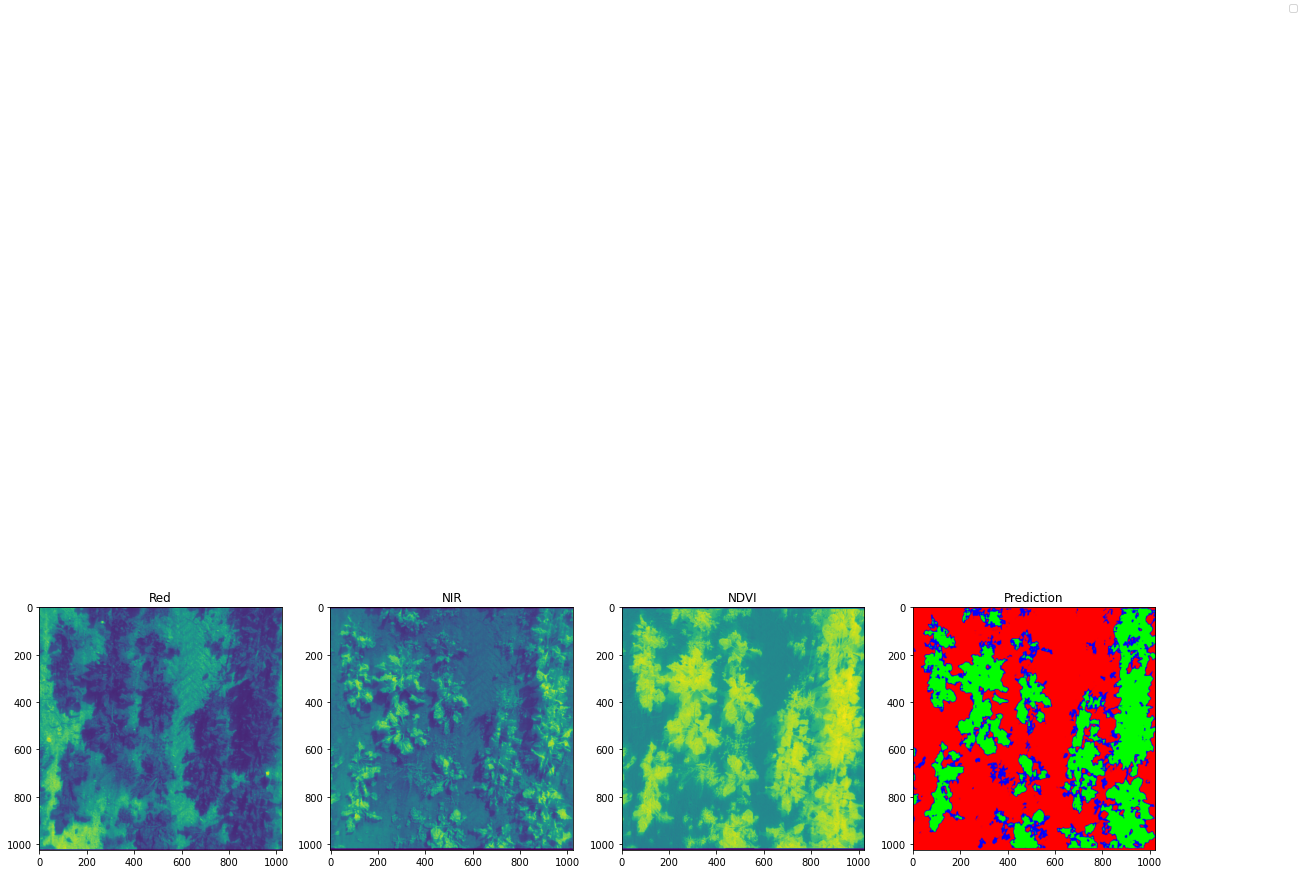

In [78]:
#Prediction publication

fig=plt.figure(figsize=(20,20),dpi=72)
ax1=fig.add_subplot(1,4,1)
ax1.imshow(x_sample[:,:,0])
ax1.set_title("Red")

ax2=fig.add_subplot(1,4,2)
ax2.imshow(x_sample[:,:,1])
ax2.set_title("NIR")

ax3=fig.add_subplot(1,4,3)
ax3.imshow(x_sample[:,:,2])
ax3.set_title("NDVI")

ax4=fig.add_subplot(1,4,4)
ax4.imshow(predictions)
ax4.set_title("Prediction")